In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

In [11]:
def get_L(n_array):
    L = n_array.sum()
    return L

def get_K(b_array):
    K = b_array[1:].sum()
    return K

def get_u(c, p):
    sigma = p['sigma']
    u = (c**(1-sigma) -1)/(1-sigma)
    return u

def u_prime(c, p):
    sigma = p['sigma']
    u_prime = c**(-sigma)
    return u_prime
    
    return u_prime
def get_w(K, L, p):
    A = p['A']
    alpha = p['alpha']
    w = (1-alpha)*A*(K/L)**alpha
    return w

def get_r(K, L, p):
    alpha = p['alpha']
    A = p ['A']
    delta = p['delta']
    r = alpha*A*(L/K)**(1-alpha) - delta
    
    return r

def get_Y(K, L, p):
    alpha = p['alpha']
    A = p['A']
    Y = A*K**alpha*L**(1-alpha)
    return Y

def get_c(b, p, f):
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    
    c = np.zeros(S)
    for i in range(b.shape[0]-1):
        c[i] = (1+r)*b[i]+w*n[i]-b[i+1]
        
        
    return c



In [15]:

def equations_ss_b(b, p, f):
    """ Takes in a guess for b and a dictionary of functions 
    f and a dictionary of elemtns p."""
    b = np.insert(b, 0, 0)
    n = p['n']
    w = f['w'](f['K'](b), f['L'](n), p)
    r = f['r'](f['K'](b), f['L'](n), p)
    euler_list = []
    
    # Adding the first case where 1 = 0
    e_l = f['u_p'](w*n[0]+(1+r)*0-b[1], p)
    e_r = p['beta']*(1+r)*f['u_p'](w*n[1] + (1+r)*b[1]-b[2], p)
    
    e = e_l - e_r
    
    euler_list.append(e)

    # Adding all other cases
    for i in range(1, S-2):

        e_l = f['u_p'](w*n[i]+(1+r)*b[i]-b[i+1], p)
        e_r = p['beta']*(1+r)*f['u_p'](w*n[i+1] + (1+r)*b[i+1]-b[i+2], p)

        e = e_l - e_r
        
        euler_list.append(e)
    
    # Adding the case where S+1 =0
    e_l = f['u_p'](w*n[S-2]+(1+r)*b[S-2]-b[S-1], p)
    e_r = p['beta']*(1+r)*f['u_p'](w*n[S-1] + (1+r)*b[S-1], p)

    e = e_l - e_r

    euler_list.append(e)

    return euler_list
    
def get_ss_b(bvec_guess, p, f):
    start_time = time.clock()
    n = p['n']
    b_ss = np.zeros_like(bvec_guess)
    F = lambda b: equations_ss_b(b, p, f)
    
    b_ss[1:] = fsolve(F, bvec_guess[1:])
    
    b_ss[0] = 0
    b_ss = np.insert(b_ss, -1, 0)
    c_ss = f['c'](b_ss, p, f)
    w_ss = f['w'](f['K'](b_ss), f['L'](n), p)
    r_ss = f['r'](f['K'](b_ss), f['L'](n), p)
    
        
    K_ss = f['K'](b_ss)
    L_ss = f['L'](n)
    Y_ss = f['Y'](K_ss, L_ss, p)
    C_ss = c_ss.sum()
    
    EulErr_ss = equations_ss_b(b_ss, p, f)
    RCer_ss = Y_ss - C_ss - K_ss*(p['delta'])
    
    ss_time = time.clock() - start_time
    
    ss_output = {'b_ss':b_ss, 'c_ss':c_ss, 'w_ss':w_ss \
                , 'r_ss':r_ss, 'K_ss':K_ss, 'Y_ss':Y_ss \
                , 'C_ss':C_ss, 'EulErr_ss':EulErr_ss, 'RCerr_ss': \
                RCer_ss, 'ss_time':ss_time}
    return ss_output

In [16]:
S = 80
functions = {'L':get_L, 'K':get_K, 'r':get_r, 'u':get_u, 'u_p':u_prime, 
             'w':get_w,'c':get_c, 'Y':get_Y}

params = {'beta':0.96**(80/S), 'delta': 1- (1-0.05)**(80/S), 'sigma':3 , \
          'A':1, 'alpha':0.35, 'n':np.array([1]*(int(2*S/3)+1) +[.2]*(int(S-2*S/3)))}

In [24]:
ss_variables = get_ss_b(np.ones(80)*0.1, params, functions)
ss_variables

{'C_ss': 98.78136215038788,
 'EulErr_ss': [-0.058242404732064934,
  -6.607256963775399e-10,
  -4.229783190368153e-12,
  2.2124146958901747e-10,
  -7.737821494657737e-11,
  -1.4371631662513096e-10,
  -5.799805080641818e-13,
  -2.832734047331087e-13,
  -1.6003864899971632e-13,
  -1.2906342661267445e-13,
  -9.18709552877317e-14,
  -8.465450562766819e-14,
  -1.0258460747536446e-13,
  -7.72715225139109e-14,
  -8.920642002863133e-14,
  -7.005507285384738e-14,
  -7.394085344003543e-14,
  -6.777911565336581e-14,
  -7.432943149865423e-14,
  -7.627232179174825e-14,
  -8.310019339319297e-14,
  -5.695444116327053e-14,
  -7.771561172376096e-14,
  -8.859579736508749e-14,
  -6.106226635438361e-14,
  -8.343326030058051e-14,
  -8.08242361927114e-14,
  -7.849276784099857e-14,
  -3.8691272408186705e-14,
  -1.1718404024918527e-13,
  -4.39648317751562e-14,
  -7.638334409421077e-14,
  -1.0536016503692736e-13,
  -1.199040866595169e-13,
  -1.290079154614432e-13,
  -6.783462680459706e-14,
  -1.361133428190442e

In [26]:
print("Time it took is",ss_variables['ss_time'], 'seconds')

Time it took is 0.09253499999999981 seconds


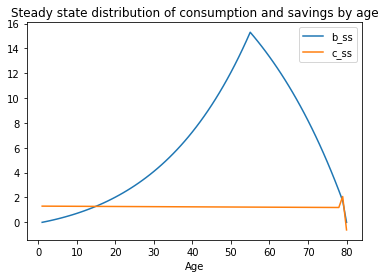

In [27]:
plt.plot(range(1, 81), ss_variables['b_ss'][:-1], label = 'b_ss')
plt.plot(range(1, 81), ss_variables['c_ss'], label = 'c_ss')
plt.xlabel('Age')
plt.title('Steady state distribution of consumption and savings by age')
plt.legend()
plt.show()

In [30]:
params['n'] = np.array([1]*(int(S/2)) +[.2]*(int(S/2)))
ss_variables_new = get_ss_b(np.ones(80)*0.1, params, functions)

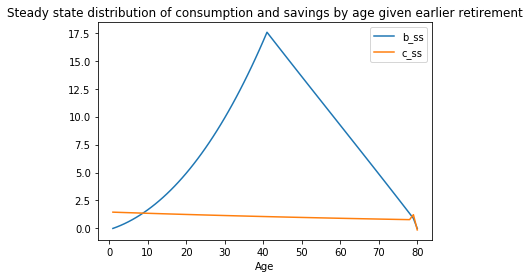

In [33]:
plt.plot(range(1, 81), ss_variables_new['b_ss'][:-1], label = 'b_ss')
plt.plot(range(1, 81), ss_variables_new['c_ss'], label = 'c_ss')
plt.xlabel('Age')
plt.title('Steady state distribution of consumption and savings by \
            age given earlier retirement')
plt.legend()
plt.show()

In [34]:
"""The general intuition can be that for savings, individuals save earlier in 
order to have more capital once retired. This can be seen by looking at how the 
blue curve has shifted to the left. It can also be observed that it has a higher
peak due to the fact that more savings need to be acculumated since retirement is 
later. Consumption on the other hand is fairly steady."""

'The general intuition can be that for savings, individuals save earlier in \norder to have more capital once retired. This can be seen by looking at how the \nblue curve has shifted to the left. It can also be observed that it has a higher\npeak due to the fact that more savings need to be acculumated since retirement is \nlater. Consumption on the other hand is fairly steady.'